#Quiz
>bicycle_out.csv의 이상치를 제거하시오

#풀이

##1. 데이터 읽어 오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/1. 데이터 분석을 위한 기초 통계 수학/data/bicycle_out.csv', engine='python', encoding='cp949')
df

##2. boxplot 확인


{'boxes': [<matplotlib.lines.Line2D at 0x7fa0cf3d09d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa0cf35ca90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0cf3e6150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa0cf363590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa0cf3d0fd0>,
  <matplotlib.lines.Line2D at 0x7fa0cf35c550>]}

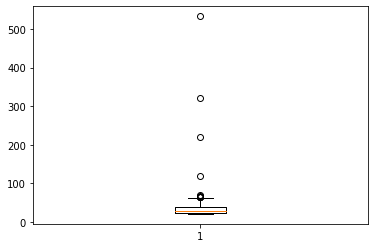

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['나이'])

>확인 결과 나이가 많은 것이 문제가 되는듯 하다. IRQ를 구해 이상치 데이터를 확인해 보자

##3. 이상치 확인


In [ ]:
import numpy as np

# df['나이'].describe()

q1, q3 = np.percentile(df['나이'], [25, 75])
iqr = q3-q1

upperfence = q3+iqr*1.5
df[df['나이']>upperfence]

>이상치 확인을 위해 iqr에 1.5를 곱한 값을 적용시켜 보았다. 60대이후 120세부터 자전거를 대여했다고 나오는데 120세는 정상적인 나이가 아니므로 120세 이후 데이터를 삭제하면 될 듯하다.

In [ ]:
df = df[df['나이']<120]
plt.boxplot(df['나이'])